In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from dateutil.parser import parse
import numpy as np

In [2]:
sensores = pd.read_csv("../data/sensores.csv",index_col=0,parse_dates=True)

In [3]:
def plot_co2(sensores,fecha1="2021-09-23 13:20",deltat="1H",
             lista=["fluke","s8lp","scd30","sen0220"],
             ymin=300,ymax=500,calibracion=False):
    fig, ax = plt.subplots(figsize=(12,4))

    fecha1 = parse(fecha1) 
    fecha2 = fecha1 + pd.Timedelta(deltat)
    
    for sensor in lista:
        ax.plot(sensores[sensor],label=sensor)
    

    ax.fill_between(sensores.fluke.index,sensores.fluke+50,sensores.fluke-50,alpha=0.4)

    ax.set_ylim(ymin,ymax)
    ax.set_ylabel("CO2 [ppm]")
    ax.set_xlabel("Tiempo [mm-dd HH]")
    ax.set_yticks(np.arange(ymin-50,ymax+50,50))
    # ax.set_title("Mediciones CO2")
    ax.legend()
    ax.set_xlim(fecha1,fecha2)
    ax.grid()
    if calibracion:
        return sensores[fecha1:fecha2]

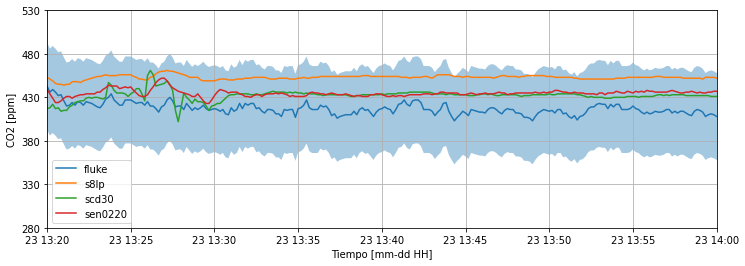

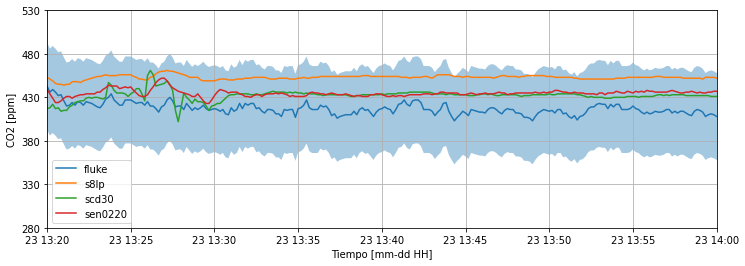

In [4]:
fecha1 = "2021-09-23 13:20"
ymin = 330
ymax = 500
plot_co2(sensores,fecha1=fecha1,deltat="40Min",ymin=ymin,ymax=ymax)
calibra430 = plot_co2(sensores,fecha1=fecha1,deltat="40Min",ymin=ymin,ymax=ymax,calibracion=True)

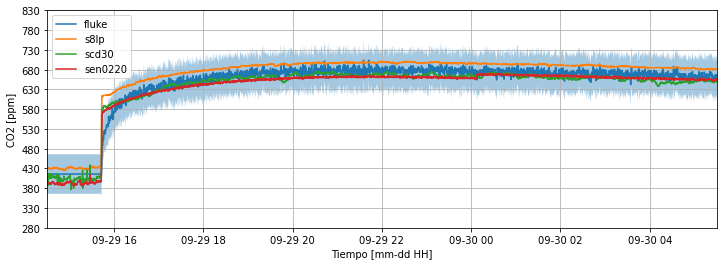

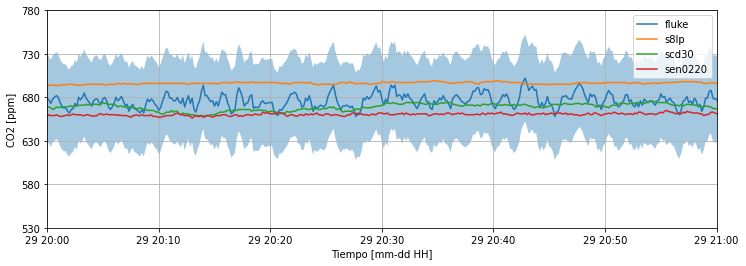

In [5]:
plot_co2(sensores,fecha1="2021-09-29 14:30",deltat="15H",ymin=330,ymax=800)
calibra650 = plot_co2(sensores,fecha1="2021-09-29 20:00",deltat="1H",ymin=580,ymax=780,calibracion=True)

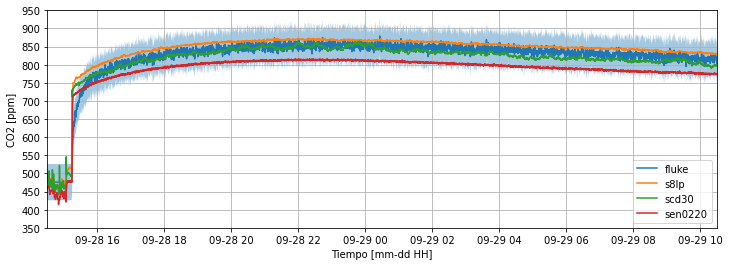

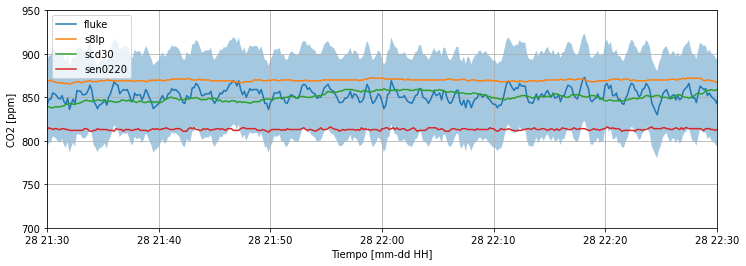

In [6]:
fecha1 = "2021-09-28 14:30"
ymin = 400
ymax = 950
plot_co2(sensores,fecha1=fecha1,deltat="20H",ymin=ymin,ymax=ymax)

fecha1 = "2021-09-28 21:30"
ymin=750
calibra850 = plot_co2(sensores,fecha1=fecha1,deltat="1H",ymin=ymin,ymax=ymax,calibracion=True)

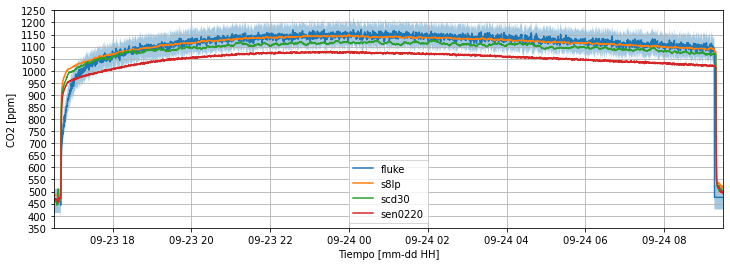

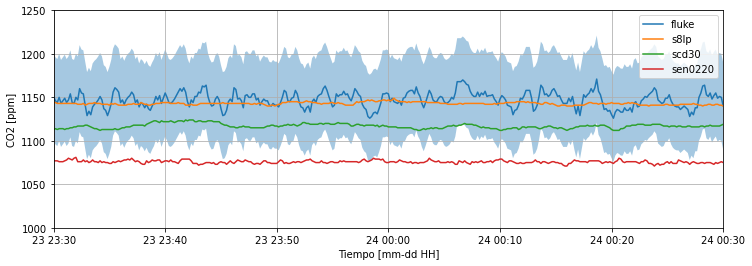

In [7]:
fecha1 = "2021-09-23 16:30"
ymin = 400
ymax = 1250
plot_co2(sensores,fecha1=fecha1,deltat="17H",ymin=ymin,ymax=ymax)

fecha1 = "2021-09-23 23:30"
ymin=1050
calibra1150 = plot_co2(sensores,fecha1=fecha1,deltat="1H",ymin=ymin,ymax=ymax,calibracion=True)

In [8]:
calibra = pd.concat([calibra430,calibra650,calibra850,calibra1150],axis=0)
calibra

,fluke,s8lp,sen0220,scd30
2021-09-23 13:20:00,443.0,453.0,439.0,417.0
2021-09-23 13:20:10,436.0,451.0,434.0,418.0
2021-09-23 13:20:20,439.0,449.0,429.0,422.0
2021-09-23 13:20:30,436.0,446.0,424.0,417.0
2021-09-23 13:20:40,432.0,445.0,424.0,418.0
...,...,...,...,...
2021-09-24 00:29:20,1155.0,1142.0,1075.0,1117.0
2021-09-24 00:29:30,1149.0,1142.0,1074.0,1117.0
2021-09-24 00:29:40,1151.0,1141.0,1075.0,1117.0
2021-09-24 00:29:50,1150.0,1141.0,1076.0,1118.0


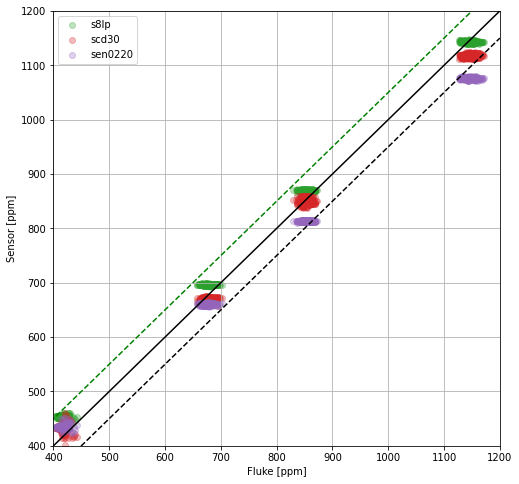

In [9]:
fig, ax = plt.subplots(figsize=(8,8))

X = np.linspace(300,1200,2)
sensores = ['fluke','s8lp','scd30','sen0220']
colores  = ['C1','C2','C3','C4']
for sensor,color in zip(sensores[1:],colores[1:]):
    ax.scatter(calibra['fluke'],calibra[sensor],c=color,label=sensor,alpha=0.3)

ax.plot(X,X,'k-')
ax.plot(X,X+50,'g--')
ax.plot(X,X-50,'k--')




ax.set_yticks(np.arange(300,1250,100))
ax.set_xticks(np.arange(300,1250,100))
ax.set_xlabel("Fluke [ppm]")
ax.set_ylabel("Sensor [ppm]")
ax.legend()
ax.set_xlim(400,1200)
ax.set_ylim(400,1200)
ax.grid()